# Canonical Correlation Analysis (CCA)

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore")

In [2]:
from scientisttools import load_lifecyclesavings
lifecyclesavings = load_lifecyclesavings()
lifecyclesavings.head(6)

,sr,pop15,pop75,dpi,ddpi
rownames,,,,,
Australia,11.43,29.35,2.87,2329.68,2.87
Austria,12.07,23.32,4.41,1507.99,3.93
Belgium,13.17,23.80,4.43,2108.47,3.82
Bolivia,5.75,41.89,1.67,189.13,0.22
Brazil,12.88,42.19,0.83,728.47,4.56
Canada,8.79,31.72,2.85,2982.88,2.43


In [3]:
from scientisttools import CCA
res_cca = CCA(lifecyclesavings,vars=[1,2])

### Global informations

In [4]:
res_cca.statistics_.keys()

dict_keys(['infos', 'stats'])

In [5]:
res_cca.statistics_["infos"]

,Name,Value
0,Variables VAR,2
1,Variables WITH,3
2,Observations,50


In [6]:
res_cca.statistics_["stats"]

,count,mean,std,min,25%,50%,75%,max
pop15,50.0,35.0896,9.151727,21.44,26.2150,32.575,44.0650,47.64
pop75,50.0,2.2930,1.290771,0.56,1.1250,2.175,3.3250,4.70
sr,50.0,9.6710,4.480407,0.60,6.9700,10.510,12.6175,21.10
dpi,50.0,1106.7584,990.868889,88.94,288.2075,695.665,1795.6225,4001.89
ddpi,50.0,3.7576,2.869871,0.22,2.0025,3.000,4.4775,16.71


### Canonical correlations

In [7]:
res_cca.can_corr_

,canonical correlation,squared canonical correlation
0,0.824797,0.680289
1,0.365276,0.133427


#### Standardized canonical coefficients

In [8]:
res_cca.standardized_cancoef_

{'x_standardized': array([[ 0.79881308,  0.70231491],
        [-0.60157931,  0.7118664 ]]),
 'y_standardized': array([[ 0.28005745,  0.8743085 ],
        [ 0.9559119 , -0.43956799],
        [ 0.08831912, -0.2058267 ]])}

### Coefficients canoniques bruts

In [9]:
res_cca.coef_.keys()

dict_keys(['xcoef', 'ycoef'])

#### Coefficients canoniques bruts pour le(la) Variables VAR

In [10]:
res_cca.coef_["xcoef"]

,V.1,V.2
pop15,0.063776,-0.253554
pop75,-0.340533,-1.822181


#### Coefficients canoniques bruts pour le(la) Variables WITH

In [11]:
res_cca.coef_["ycoef"]

,W.1,W.2
sr,-0.059297,0.233655
dpi,-0.000915,-0.000531
ddpi,-0.029194,-0.085875


### Canonical loadings

In [12]:
res_cca.ind_["xscores"].head(6)

,V.1,V.2
rownames,,
Australia,-0.562536,0.403902
Austria,-1.471525,-0.873323
Belgium,-1.447724,-1.031473
Bolivia,0.645854,-0.589053
Brazil,0.951034,0.865513
Canada,-0.404576,-0.160578


In [13]:
res_cca.ind_["yscores"].head(6)

,W.1,W.2
rownames,,
Australia,-1.197583,-0.162364
Austria,-0.514486,0.332610
Belgium,-1.126047,0.280117
Bolivia,1.175575,-0.124948
Brazil,0.132491,0.881832
Canada,-1.625987,-1.088394


#### Correlations entre le(la) variables VAR et leurs variables canoniques

In [14]:
# Correlations entre le(la) variables VAR et leurs variables canoniques
res_cca.var_["corr_X_xscores"]

,V.1,V.2
pop15,0.982982,-0.183702
pop75,-0.969793,-0.243930


#### Correlations entre le(la) variables WITH et leurs variables canoniques

In [15]:
# Correlations entre le(la) variables WITH et leurs variables canoniques
res_cca.var_["corr_Y_yscores"]

,W.1,W.2
sr,-0.491038,0.855776
dpi,-0.954517,-0.263727
ddpi,-0.047338,0.140774


#### Correlations entre le(la) Variables VAR et les variables canoniques du/de la Variables WITH

In [16]:
# Correlations entre le(la) Variables VAR et les variables canoniques du/de la Variables WITH
res_cca.var_["corr_X_yscores"]

,W.1,W.2
pop15,0.810760,-0.067102
pop75,-0.799882,-0.089102


#### Correlations entre le(la) Variables WITH et les variables canoniques du/de la Variables VAR

In [17]:
# Correlations entre le(la) Variables WITH et les variables canoniques du/de la Variables VAR
res_cca.var_["corr_Y_xscores"]

,V.1,V.2
sr,-0.405006,0.312595
dpi,-0.787283,-0.096333
ddpi,-0.039044,0.051421


### Test of canonical dimensions

In [18]:
res_cca.tstat_.keys()

dict_keys(['wilks', 'hotelling', 'pillai', 'roy'])

#### Wilks test

In [19]:
wilks = res_cca.tstat_["wilks"]
print(wilks["text"])
display(wilks["stat"])


Wilks' Lambda, using F-approximation (Rao's F):



,stat,approx,df1,df2,p.value
1 to 2:,0.277053,13.49772,6.0,90.0,7.300349e-11
2 to 2:,0.866573,3.54132,2.0,46.0,3.711268e-02


#### Hotelling test

In [20]:
hotelling = res_cca.tstat_["hotelling"]
print(hotelling["text"])
display(hotelling["stat"])


Hotelling-Lawley Trace, using F-approximation:



,stat,approx,df1,df2,p.value
1 to 2:,2.28180,16.733197,6.0,88.0,8.687495e-13
2 to 2:,0.15397,3.541320,2.0,92.0,3.298769e-02


#### Pillai test

In [21]:
pillai = res_cca.tstat_["pillai"]
print(pillai["text"])
display(pillai["stat"])


Pillai-Bartlett Trace, using F-approximation:



,stat,approx,df1,df2,p.value
1 to 2:,0.813716,10.517702,6.0,92.0,7.301321e-09
2 to 2:,0.133427,3.431143,2.0,96.0,3.636830e-02


#### Roy

In [22]:
roy = res_cca.tstat_["roy"]
print(roy["text"])
display(roy["stat"])


Roy's Largest Root, using F-approximation:



,stat,approx,df1,df2,p.value
1 to 1:,0.680289,32.626715,3.0,46.0,1.863154e-11


#### Eigenvalues

In [23]:
res_cca.eig_

,eigenvalue,difference,proportion,cumulative
Dim.1,2.127829,1.973859,93.252237,93.252237
Dim.2,0.153970,NaN,6.747763,100.000000


### Covariances

In [24]:
res_cca.cov_

{'xcov':            pop15      pop75
 pop15  82.079028 -10.517033
 pop75 -10.517033   1.632769,
 'ycov':               sr            dpi        ddpi
 sr     19.672565     958.716838    3.840630
 dpi   958.716838  962184.732017 -360.849238
 ddpi    3.840630    -360.849238    8.071434,
 'xycov':               sr          dpi      ddpi
 pop15 -18.305066 -6720.091269 -1.230985
 pop75   1.793889   986.429535  0.091923,
 'xcovb':            pop15      pop75
 pop15  83.754110 -10.731666
 pop75 -10.731666   1.666091,
 'ycovb':               sr            dpi        ddpi
 sr     20.074046     978.282487    3.919011
 dpi   978.282487  981821.155120 -368.213508
 ddpi    3.919011    -368.213508    8.236157,
 'xycovb':               sr          dpi      ddpi
 pop15 -18.678638 -6857.235988 -1.256107
 pop75   1.830499  1006.560750  0.093799}

#### Correlations

In [25]:
res_cca.corr_

{'xcorr':           pop15     pop75
 pop15  1.000000 -0.908479
 pop75 -0.908479  1.000000,
 'ycorr':             sr       dpi      ddpi
 sr    1.000000  0.220359  0.304787
 dpi   0.220359  1.000000 -0.129486
 ddpi  0.304787 -0.129486  1.000000,
 'xycorr':              sr       dpi      ddpi
 pop15 -0.455538 -0.756188 -0.047826
 pop75  0.316521  0.787000  0.025321}

## Graphs

### Individuals Factor Map

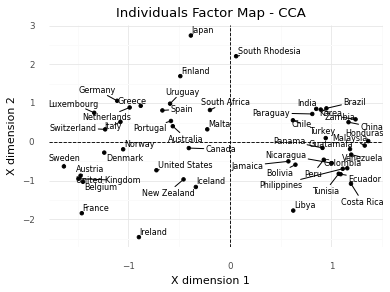

In [26]:
from scientisttools import fviz_cca
p = fviz_cca(res_cca,choice="ind",repel=True)
print(p)

### Variable Factor Map

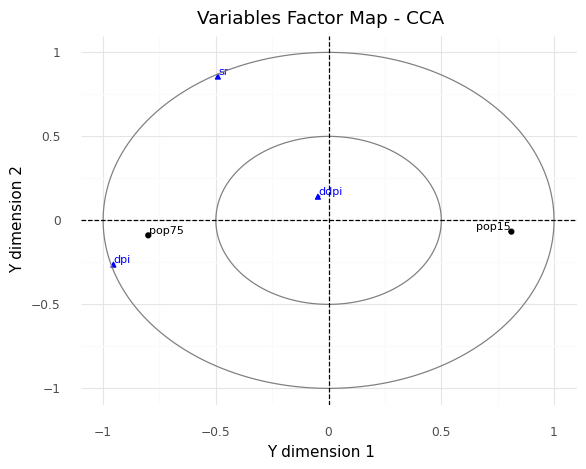

In [27]:
p = fviz_cca(res_cca,choice="var",which="Y",repel=True)
print(p)

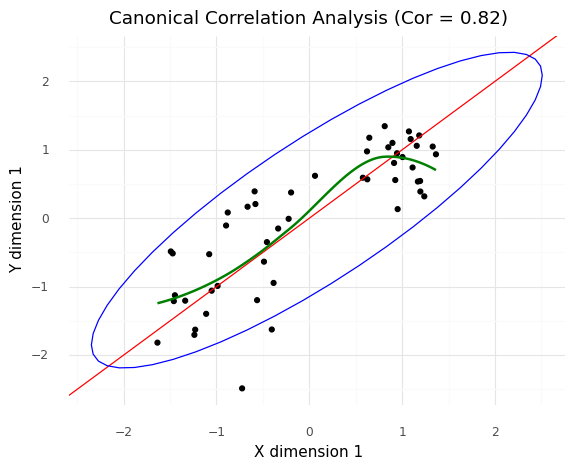

In [28]:
p = fviz_cca(res_cca,choice="scatter",which=0,repel=False,geom="point",smooth=True,add_ellipse=True)
print(p)